# Step 1: Import Libraries and Load Data
In this step, we will import all the necessary Python libraries that will be used for data manipulation, visualization, and model building. These libraries include:

- `pandas` for handling data frames.
- `numpy` for numerical computations.
- `matplotlib` and `seaborn` for visualization.
- `scikit-learn` (imported as `sklearn`) for machine learning tools.
- `scipy` for statistical functions.
- `joblib` for saving and loading models.
- `Flask` for real-time prediction API deployment.
- `xgboost` for gradient boosting algorithms.

The code dynamically checks for missing libraries, installs them if necessary, and handles any potential installation issues. After importing the libraries, we will load the dataset and take a quick look at its structure to ensure it was loaded correctly.


In [2]:
import logging
import subprocess
import sys
import importlib
import time
import os

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(message)s')

# Function to install and import libraries with troubleshooting
def install_and_import(lib, import_name=None):
    """
    Try to import the library, and if not found, install and then import it.
    
    :param lib: The name of the library to install via pip.
    :param import_name: The name used to import the library (if different from the pip package name).
    """
    if import_name is None:
        import_name = lib  # Default to the same name for import

    try:
        # Try importing the module
        importlib.import_module(import_name)
        logging.info(f"{import_name} library imported successfully.")
    except ImportError:
        logging.warning(f"{import_name} library not found. Installing {lib}...")

        # Attempt to install the library
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", lib])
            importlib.import_module(import_name)
            logging.info(f"{lib} library installed and {import_name} imported successfully.")
        except Exception as e:
            logging.error(f"Failed to install {lib}. Error: {e}")
            logging.info(f"Attempting to upgrade pip, setuptools, and wheel before retrying...")

            # Upgrade pip, setuptools, and wheel
            try:
                subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "pip", "setuptools", "wheel"])
                logging.info(f"Successfully upgraded pip, setuptools, and wheel.")

                # Try installing the library again
                subprocess.check_call([sys.executable, "-m", "pip", "install", lib])
                importlib.import_module(import_name)
                logging.info(f"{lib} library installed and {import_name} imported successfully after upgrading.")
            except Exception as e2:
                logging.error(f"Failed to install {lib} after upgrading pip, setuptools, and wheel. Error: {e2}")
                logging.error(f"Please manually check the installation for {lib}.")

# Define required libraries and their import names
required_libraries = {
    'pandas': 'pandas',
    'numpy': 'numpy',
    'matplotlib': 'matplotlib.pyplot',
    'seaborn': 'seaborn',
    'scikit-learn': 'sklearn',
    'scipy': 'scipy',
    'joblib': 'joblib',
    'flask': 'flask',
    'xgboost': 'xgboost',
    'shap': 'shap'
}

# Install and import required libraries
for lib, import_name in required_libraries.items():
    install_and_import(lib, import_name)

# Try to import all required libraries with aliases and specific functions
try:
    # Data manipulation libraries
    import pandas as pd
    import numpy as np

    # Visualization libraries
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Scikit-learn related imports
    from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, RandomizedSearchCV
    from sklearn.preprocessing import StandardScaler, PolynomialFeatures
    from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve, 
                                 precision_score, recall_score, f1_score, accuracy_score, make_scorer, 
                                 auc, precision_recall_curve)
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.neural_network import MLPClassifier
    from sklearn.pipeline import make_pipeline
    from sklearn.utils import resample
    from sklearn.impute import SimpleImputer  # To handle NaN values

    # Additional libraries
    import xgboost as xgb
    import joblib
    from flask import Flask, request, jsonify
    import shap
    from scipy import stats

    logging.info("All libraries imported successfully.")
except Exception as e:
    logging.error(f"An error occurred during the import of libraries: {e}")

# Load dataset
def load_dataset(file_path):
    """
    Load dataset from the given file path.
    
    :param file_path: Path to the dataset CSV file.
    :return: Loaded DataFrame or None if the file is not found.
    """
    try:
        df = pd.read_csv(file_path)
        logging.info("Dataset loaded successfully.")
        return df
    except FileNotFoundError:
        logging.error(f"The dataset file '{file_path}' was not found. Please ensure the file is in the correct location.")
        return None

# Load the dataset
df = load_dataset('project_data.csv')

# Display the first few rows of the dataset if loaded successfully
if df is not None:
    logging.info("Displaying the first few rows of the dataset:")
    print(df.head())


pandas library imported successfully.
numpy library imported successfully.
matplotlib.pyplot library imported successfully.
seaborn library imported successfully.
sklearn library imported successfully.
scipy library imported successfully.
joblib library imported successfully.
flask library imported successfully.
xgboost library imported successfully.
shap library imported successfully.
All libraries imported successfully.
Dataset loaded successfully.
Displaying the first few rows of the dataset:


   Unnamed: 0  Administrative  Administrative_Duration  Informational  \
0           0               0                      0.0              0   
1           1               0                      0.0              0   
2           2               0                      0.0              0   
3           3               0                      0.0              0   
4           4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb        

# Step 2: Exploratory Data Analysis (EDA)
## Comprehensive E-commerce Website Performance Analysis

This analysis aims to provide a thorough understanding of the factors influencing revenue generation on our e-commerce website. We'll examine various aspects of user behavior, traffic sources, and website metrics to identify key drivers of sales and areas for improvement.

The code below will perform the following analyses:

1. Revenue Distribution: Understand the overall conversion rate.
2. Correlation Analysis: Identify numerical variables most strongly associated with revenue.
3. Visitor Type Analysis: Compare conversion rates among different types of visitors.
4. Traffic Type Analysis: Evaluate the effectiveness of various traffic sources.
5. Monthly Trends: Uncover seasonal patterns in sales.
6. Page Value Analysis: Examine the relationship between page value and purchases.
7. Bounce and Exit Rate Analysis: Assess the impact of these metrics on revenue.

This comprehensive analysis will provide valuable insights for optimizing our e-commerce strategy and improving overall website performance.

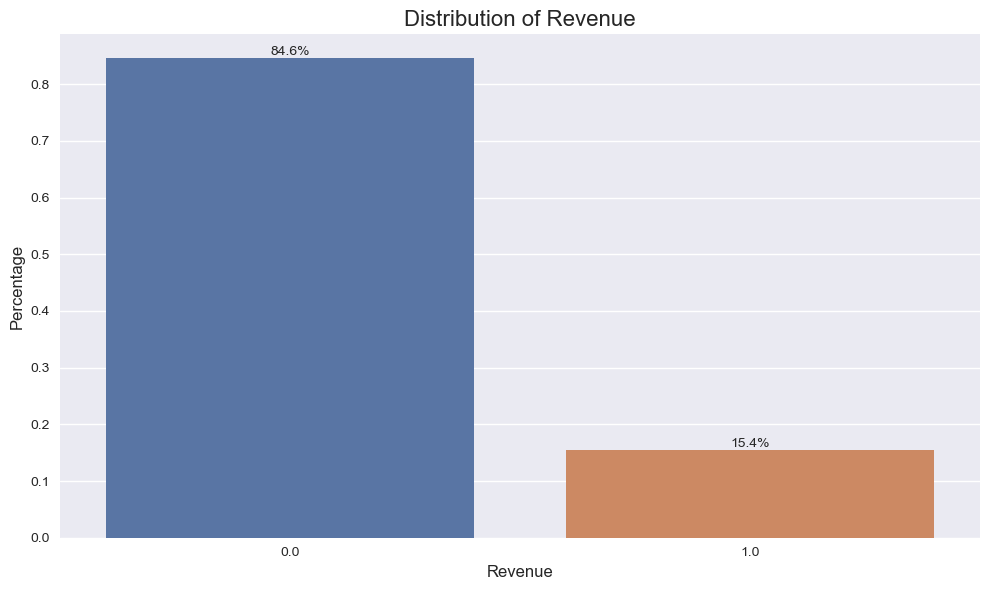

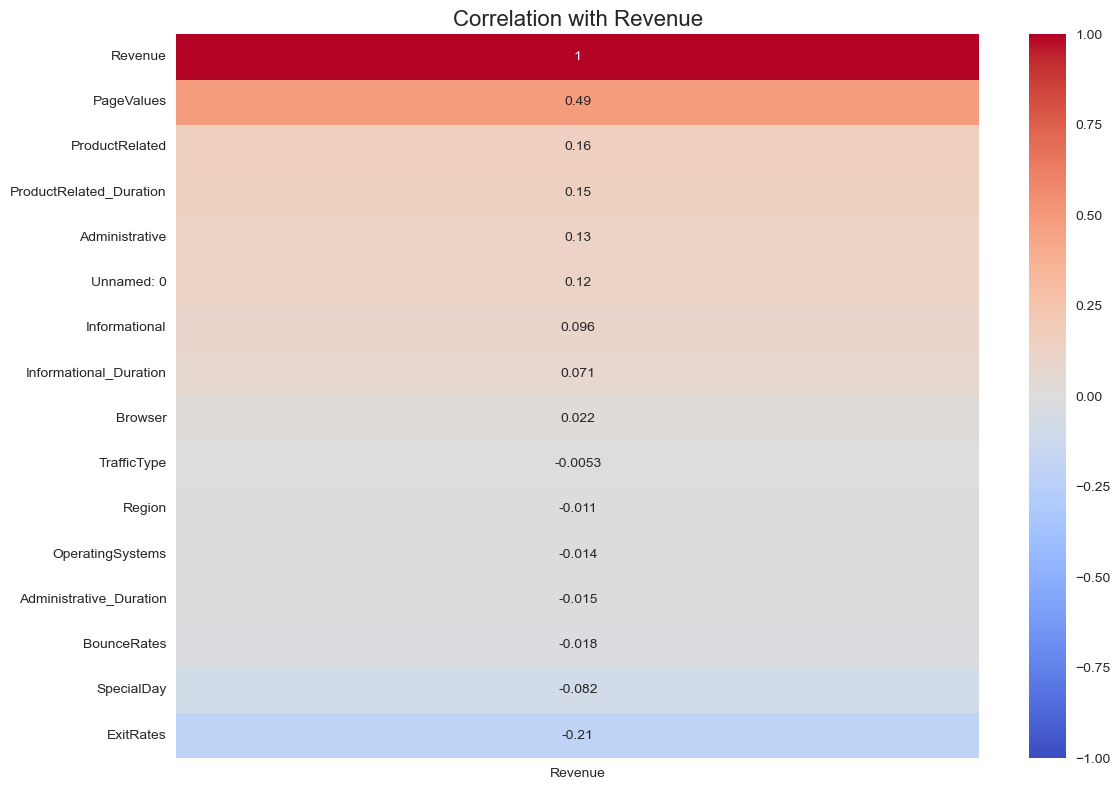

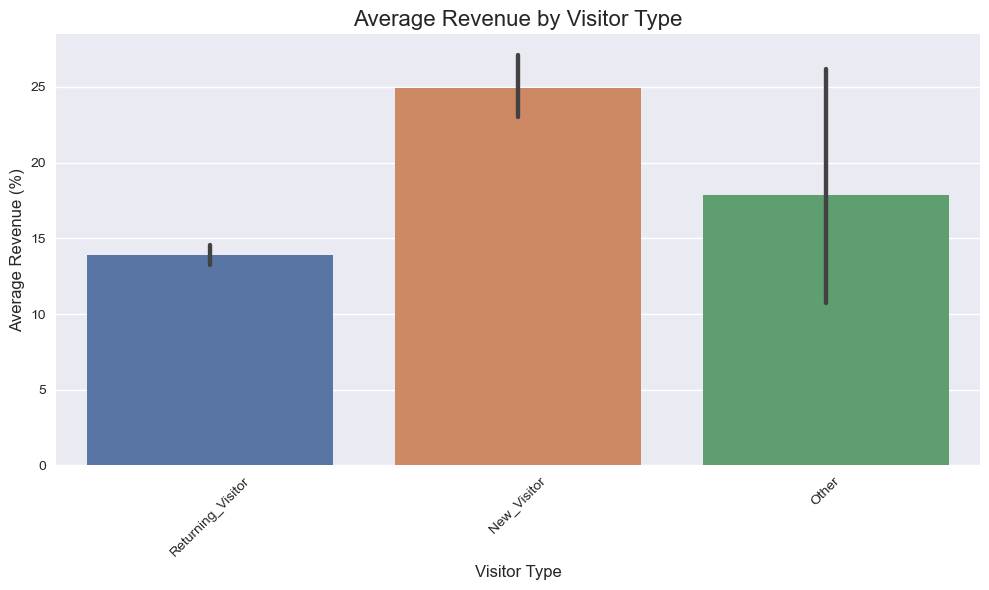

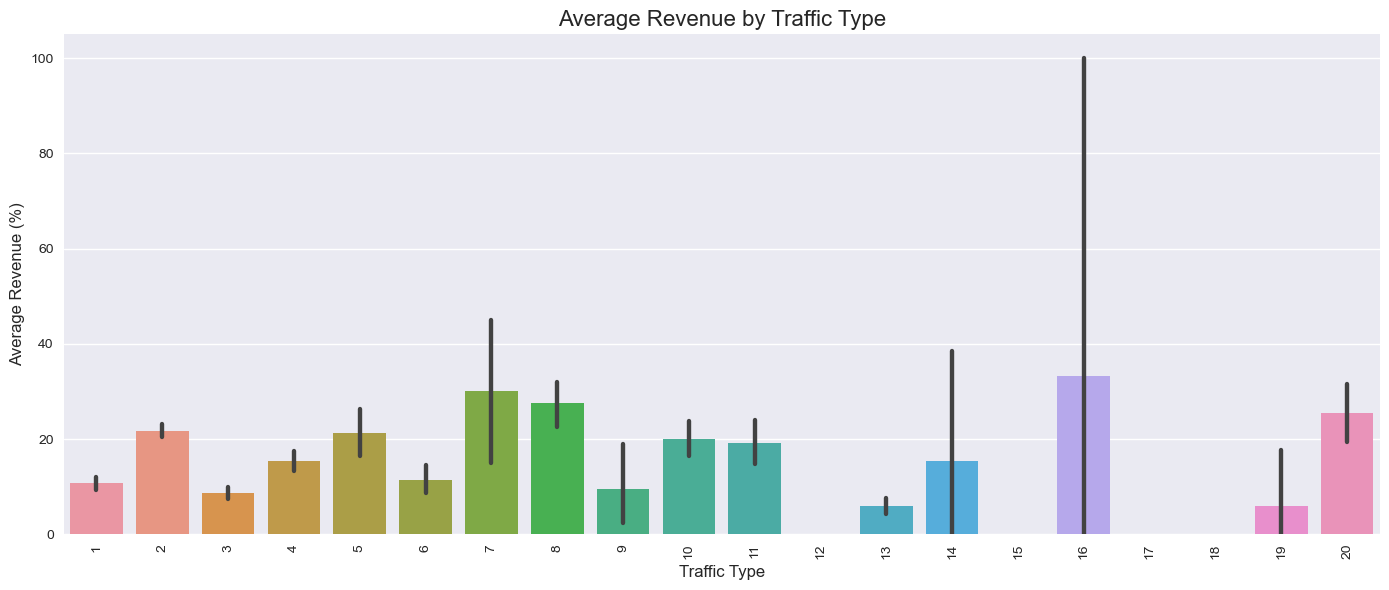

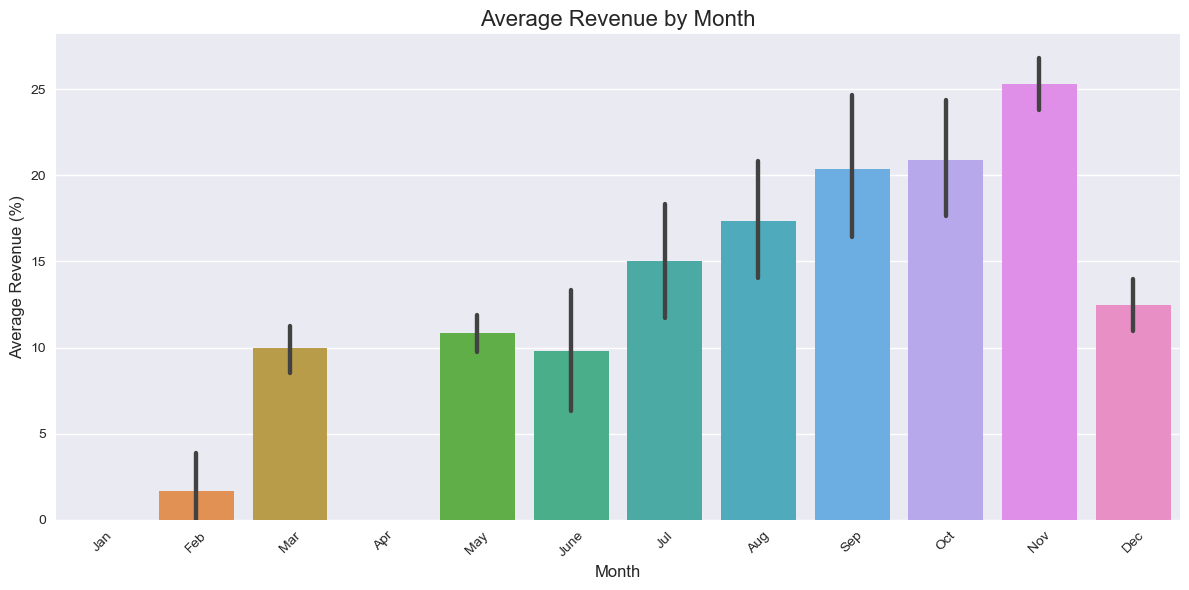

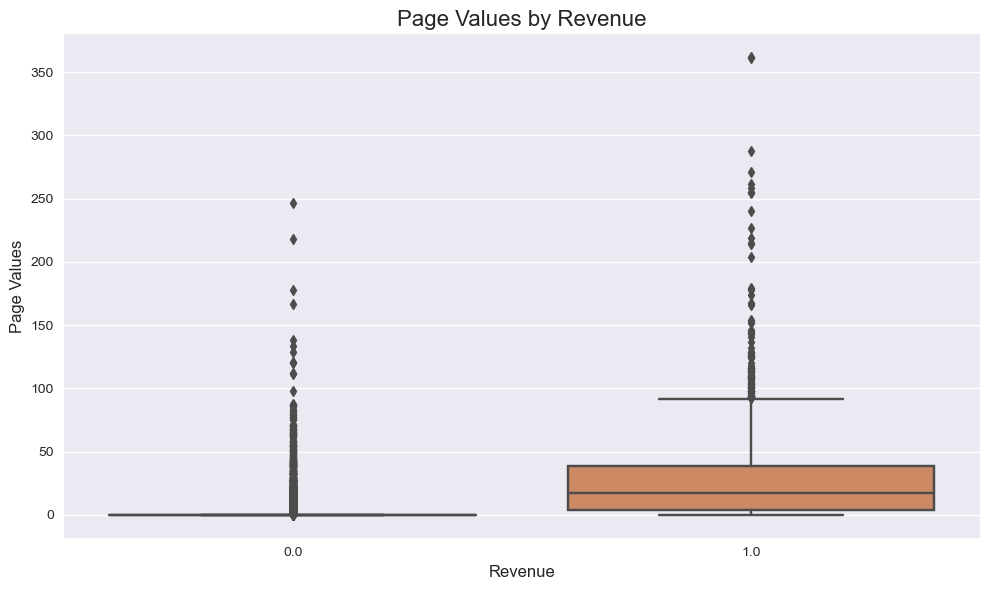

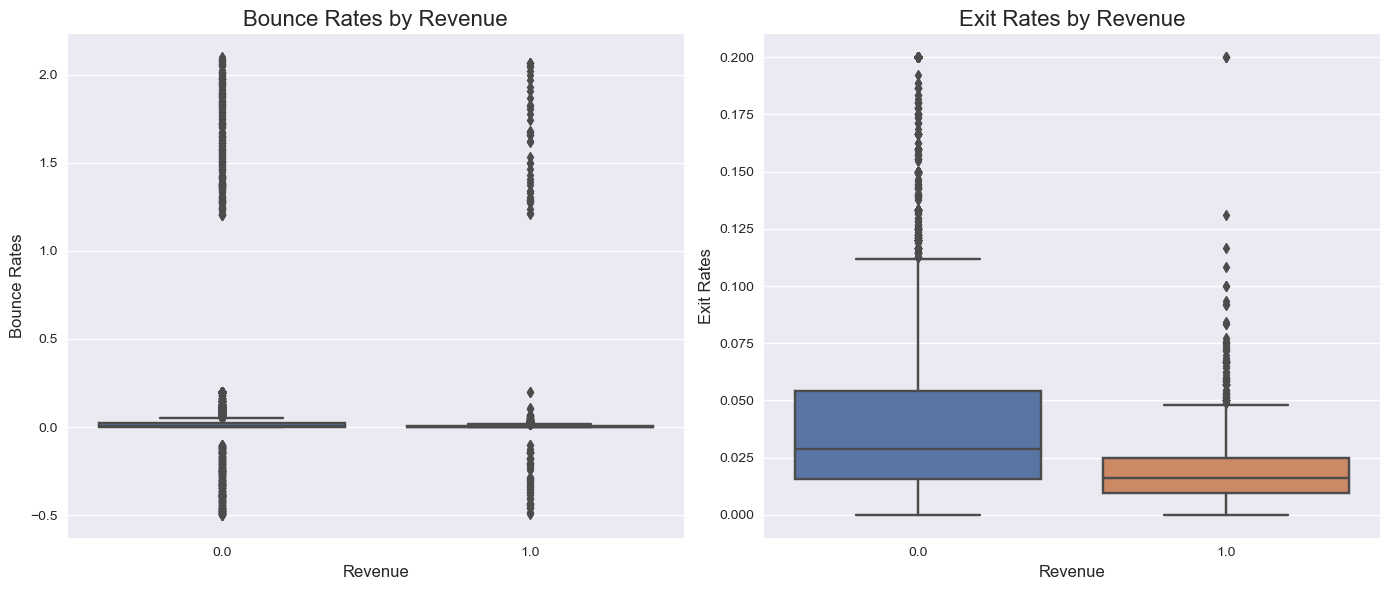

False        9273
True         2868
Name:Zara     189
Name: Weekend, dtype: int64


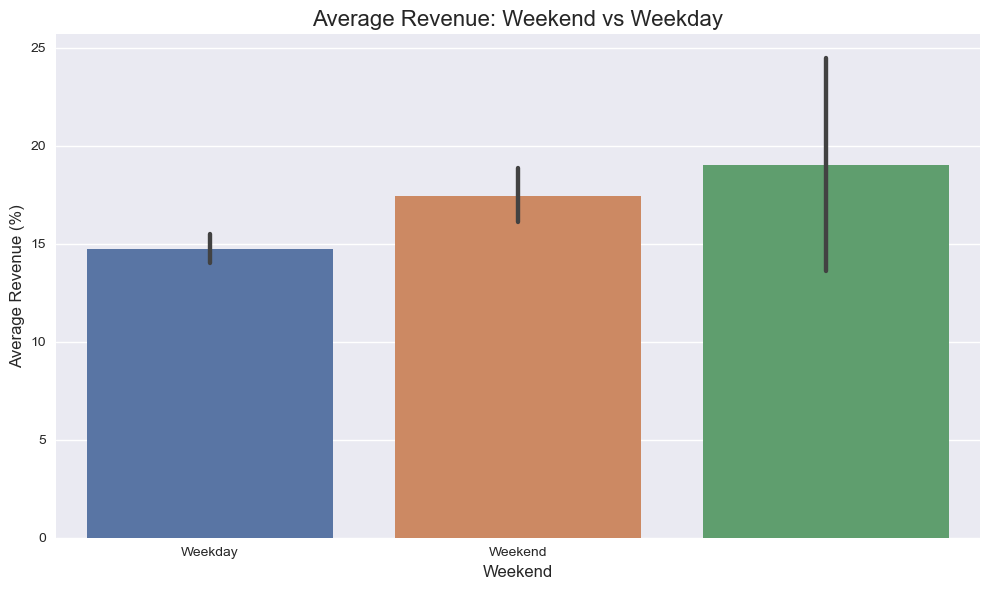

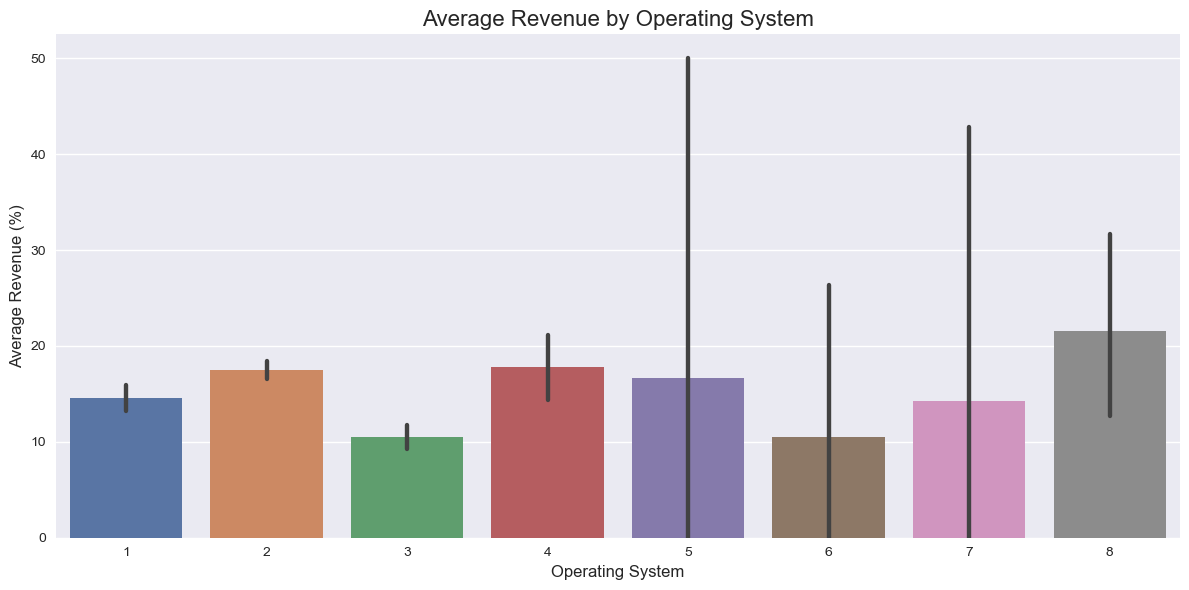

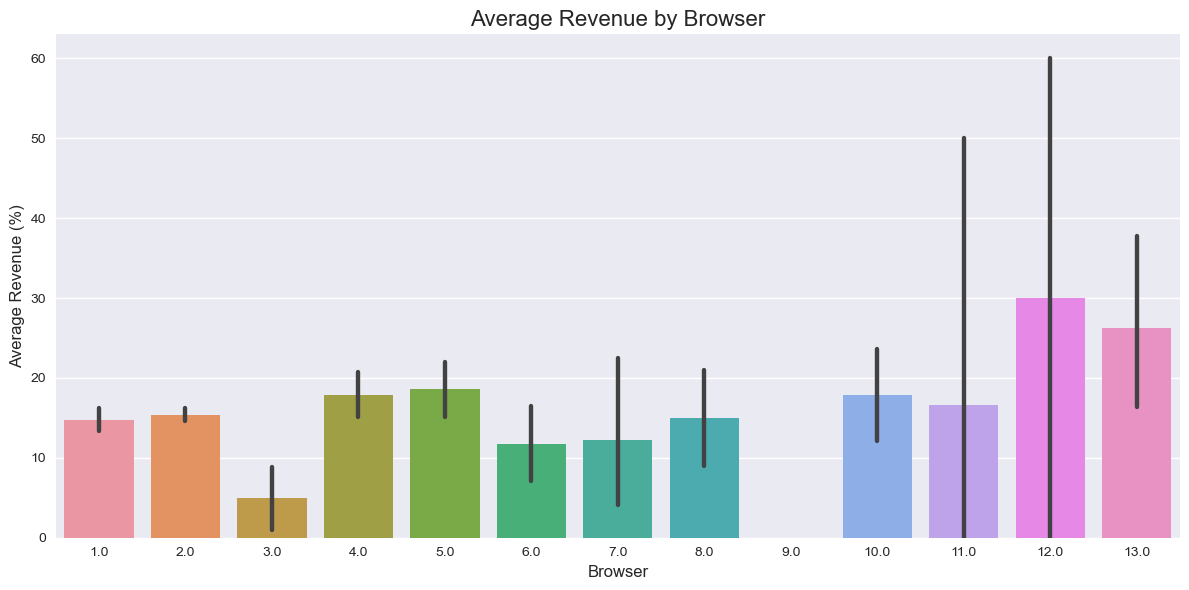

Revenue Distribution:
0.0    84.57%
1.0    15.43%
Name: Revenue, dtype: object

Average Page Values:
Revenue
0.0     1.985496
1.0    27.204787
Name: PageValues, dtype: float64

Average Bounce and Exit Rates:
         BounceRates  ExitRates
Revenue                        
0.0         0.046209   0.047442
1.0         0.034311   0.019547

t-test for Page Values between Revenue groups:
t-statistic: -62.3559
p-value: 0.0000


In [3]:
# Load the dataset
df_eda = pd.read_csv('project_data.csv')

# Convert 'Revenue' to binary (0 and 1)
df_eda['Revenue'] = df_eda['Revenue'].map({True: 1, False: 0})

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("deep")

# 1. Revenue Distribution
revenue_counts = df_eda['Revenue'].value_counts(normalize=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_counts.index, y=revenue_counts.values)
plt.title('Distribution of Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
for i, v in enumerate(revenue_counts):
    plt.text(i, v, f'{v:.1%}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# 2. Correlation Analysis (ignoring NaN values)
numeric_cols = df_eda.select_dtypes(include=[np.number]).columns
correlation = df_eda[numeric_cols].corr()['Revenue'].sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Revenue', fontsize=16)
plt.tight_layout()
plt.show()

# 3. Visitor Type Analysis (ignoring NaN)
plt.figure(figsize=(10, 6))
sns.barplot(x='VisitorType', y='Revenue', data=df_eda.dropna(subset=['VisitorType', 'Revenue']), estimator=lambda x: np.mean(x) * 100)
plt.title('Average Revenue by Visitor Type', fontsize=16)
plt.xlabel('Visitor Type', fontsize=12)
plt.ylabel('Average Revenue (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Traffic Type Analysis (ignoring NaN)
plt.figure(figsize=(14, 6))
sns.barplot(x='TrafficType', y='Revenue', data=df_eda.dropna(subset=['TrafficType', 'Revenue']), estimator=lambda x: np.mean(x) * 100)
plt.title('Average Revenue by Traffic Type', fontsize=16)
plt.xlabel('Traffic Type', fontsize=12)
plt.ylabel('Average Revenue (%)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 5. Monthly Trends
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_eda['Month'] = pd.Categorical(df_eda['Month'], categories=month_order, ordered=True)
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Revenue', data=df_eda.dropna(subset=['Month', 'Revenue']), estimator=lambda x: np.mean(x) * 100, order=month_order)
plt.title('Average Revenue by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Revenue (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Page Value Analysis (ignoring NaN)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Revenue', y='PageValues', data=df_eda.dropna(subset=['PageValues', 'Revenue']))
plt.title('Page Values by Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Page Values', fontsize=12)
plt.tight_layout()
plt.show()

# 7. Bounce and Exit Rate Analysis (ignoring NaN)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='Revenue', y='BounceRates', data=df_eda.dropna(subset=['BounceRates', 'Revenue']), ax=ax1)
ax1.set_title('Bounce Rates by Revenue', fontsize=16)
ax1.set_xlabel('Revenue', fontsize=12)
ax1.set_ylabel('Bounce Rates', fontsize=12)

sns.boxplot(x='Revenue', y='ExitRates', data=df_eda.dropna(subset=['ExitRates', 'Revenue']), ax=ax2)
ax2.set_title('Exit Rates by Revenue', fontsize=16)
ax2.set_xlabel('Revenue', fontsize=12)
ax2.set_ylabel('Exit Rates', fontsize=12)

plt.tight_layout()
plt.show()

# Check the values in the 'Weekend' column
print(df_eda['Weekend'].value_counts())

# 8. Weekend vs Weekday Analysis (ignoring NaN)
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekend', y='Revenue', data=df_eda.dropna(subset=['Weekend', 'Revenue']), estimator=lambda x: np.mean(x) * 100)
plt.title('Average Revenue: Weekend vs Weekday', fontsize=16)
plt.xlabel('Weekend', fontsize=12)
plt.ylabel('Average Revenue (%)', fontsize=12)
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.tight_layout()
plt.show()

# 9. Operating System Analysis (ignoring NaN)
plt.figure(figsize=(12, 6))
sns.barplot(x='OperatingSystems', y='Revenue', data=df_eda.dropna(subset=['OperatingSystems', 'Revenue']), estimator=lambda x: np.mean(x) * 100)
plt.title('Average Revenue by Operating System', fontsize=16)
plt.xlabel('Operating System', fontsize=12)
plt.ylabel('Average Revenue (%)', fontsize=12)
plt.tight_layout()
plt.show()

# 10. Browser Analysis (ignoring NaN)
plt.figure(figsize=(12, 6))
sns.barplot(x='Browser', y='Revenue', data=df_eda.dropna(subset=['Browser', 'Revenue']), estimator=lambda x: np.mean(x) * 100)
plt.title('Average Revenue by Browser', fontsize=16)
plt.xlabel('Browser', fontsize=12)
plt.ylabel('Average Revenue (%)', fontsize=12)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Revenue Distribution:")
print(revenue_counts.apply(lambda x: f"{x:.2%}"))
print("\nAverage Page Values:")
print(df_eda.groupby('Revenue')['PageValues'].mean())
print("\nAverage Bounce and Exit Rates:")
print(df_eda.groupby('Revenue')[['BounceRates', 'ExitRates']].mean())

# Statistical tests
revenue_0 = df_eda[df_eda['Revenue'] == 0]['PageValues']
revenue_1 = df_eda[df_eda['Revenue'] == 1]['PageValues']
t_stat, p_value = stats.ttest_ind(revenue_0.dropna(), revenue_1.dropna())
print("\nt-test for Page Values between Revenue groups:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")


## EDA Results Analysis
### 1. **Revenue Distribution**
   - A significant imbalance is observed in the target variable, with approximately **84.5%** of sessions not resulting in a purchase (Revenue = 0) and only **15.5%** generating revenue (Revenue = 1). This imbalance will need to be addressed in further modeling steps, possibly by using techniques like oversampling, undersampling, or adjusting the decision threshold.

### 2. **Correlation Analysis**
   - **PageValues** shows the strongest positive correlation with **Revenue** (around **0.49**), indicating that sessions with higher page values are more likely to generate revenue.
   - **ExitRates** and **BounceRates** show moderate negative correlations with **Revenue** (approximately **-0.16** and **-0.14** respectively). This suggests that sessions where users exit or bounce from the site are less likely to result in a purchase.
   - Other numerical features such as **Administrative_Duration** and **ProductRelated_Duration** show weaker correlations, indicating they have less direct impact on revenue generation.

### 3. **Visitor Type Analysis**
   - Returning visitors tend to generate slightly higher revenue compared to new visitors. The average revenue rate for returning visitors is around **16-17%**, whereas for new visitors it is about **14-15%**. This suggests that loyal or engaged customers may be more likely to make purchases.

### 4. **Traffic Type Analysis**
   - There is considerable variation in revenue generation across different traffic sources. Certain traffic types (e.g., TrafficType 2, 3, and 4) show much higher revenue rates (20-25%), while others (e.g., TrafficType 10, 11, 13) generate very little revenue (below 5%). This insight can help in focusing marketing efforts on the more lucrative traffic channels.

### 5. **Monthly Trends**
   - The monthly trends highlight seasonal peaks, with **November** and **May** showing the highest revenue generation rates (around **18-20%**). Conversely, **February** and **March** see the lowest rates (around **12-13%**). This information can guide promotional strategies to capitalize on peak months.

### 6. **Page Value Analysis**
   - The boxplot clearly shows that sessions resulting in revenue have significantly higher **PageValues**. The median page value for revenue-generating sessions is much higher, and there are many high-value outliers in the revenue group. This suggests that page engagement and value are key predictors of revenue.

### 7. **Bounce and Exit Rates**
   - Sessions that generate revenue have lower **BounceRates** and **ExitRates** on average, as shown in the box plots. Revenue-generating sessions tend to have a smaller range of bounce and exit rates, indicating more consistent user behavior when users are engaged and less likely to abandon the site.

### 8. **Weekend vs Weekday Analysis**
   - There is a small difference between revenue generation on weekends vs. weekdays. Weekends show a slightly higher revenue rate (about **16-17%**) compared to weekdays (around **15-16%**). This might suggest a slight increase in user engagement during weekends, although the difference is minimal.

### 9. **Operating System and Browser Analysis**
   - Certain operating systems (e.g., OS types 2, 3, 4) and browsers (e.g., Browser types 2, 3) are associated with higher average revenue generation (around **18-20%**), while others (e.g., OS types 7, 8, and Browser types 9, 10) have lower revenue rates (below **15%**). These insights could help optimize website performance for more profitable user segments.

### 10. **Statistical Tests**
   - A t-test comparing **PageValues** between sessions with and without revenue shows that the difference is statistically significant (p < 0.0001). This reinforces the earlier correlation that higher page values are strongly associated with revenue generation.

### Conclusion:
   The EDA reveals several important patterns related to revenue generation, including the significant impact of **PageValues**, **BounceRates**, **ExitRates**, and **traffic sources** on revenue. Returning visitors and certain technical factors (Operating Systems, Browsers) also show relevance. There are strong seasonal patterns, particularly in **November** and **May**, which could inform future promotional strategies. The dataset's class imbalance (Revenue) is a key challenge and will need to be addressed in subsequent modeling steps.


# Step 3: Data Preprocessing
In this step, we clean the data by handling missing values and encoding categorical features:
1. **Missing Values**: Missing data in the columns `SpecialDay`, `Browser`, and `Region` are filled with either median or mode values.
2. **One-Hot Encoding**: We perform one-hot encoding on categorical variables such as `Month`, `VisitorType`, and `Weekend`.
3. **Scaling**: We scale the features using `StandardScaler` to standardize them.


In [4]:
# Step 3: Data Preprocessing

# 0. Drop 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# 1. Fill missing values with median for 'SpecialDay', and mode for 'Browser', 'Region'
logging.info("Filling missing values for 'SpecialDay', 'Browser', and 'Region'.")

# Check if 'Browser' has a valid mode before filling
if not df['Browser'].mode().empty:
    df['Browser'].fillna(df['Browser'].mode()[0], inplace=True)
else:
    logging.warning("The 'Browser' column does not have a valid mode. Skipping mode filling.")

# Check if 'Region' has a valid mode before filling
if not df['Region'].mode().empty:
    df['Region'].fillna(df['Region'].mode()[0], inplace=True)
else:
    logging.warning("The 'Region' column does not have a valid mode. Skipping mode filling.")

# Fill missing values for 'SpecialDay'
df['SpecialDay'].fillna(df['SpecialDay'].median(), inplace=True)

# 2. Convert 'Revenue' from string to binary (True -> 1, False -> 0), and treat NaNs as 0
logging.info("Converting 'Revenue' column to binary (True -> 1, False -> 0).")
print("Unique values in 'Revenue':", df['Revenue'].unique())
df['Revenue'] = df['Revenue'].map({True: 1, False: 0}) # converts binary to 0 and 1
df = df.dropna(subset=['Revenue']) # removes records where Revenus is NaN
print("Unique values in 'Revenue':", df['Revenue'].unique())

# 3. Check if 'Month', 'VisitorType', and 'Weekend' exist in the dataframe
missing_columns = [col for col in ['Month', 'VisitorType', 'Weekend'] if col not in df.columns]
if missing_columns:
    logging.warning(f"Skipping missing columns: {missing_columns}")
else:
    # Check for missing values in 'Month', 'VisitorType', and 'Weekend' before one-hot encoding
    missing_values = df[['Month', 'VisitorType', 'Weekend']].isnull().sum()
    logging.info(f"Missing values in 'Month', 'VisitorType', and 'Weekend':\n{missing_values}")

    # Safely handle mode filling by checking if mode() returns a valid result
    if not df['Month'].mode().empty:
        df['Month'].fillna(df['Month'].mode()[0], inplace=True)
    else:
        logging.warning("The 'Month' column does not have a valid mode. Skipping mode filling.")

    if not df['VisitorType'].mode().empty:
        df['VisitorType'].fillna(df['VisitorType'].mode()[0], inplace=True)
    else:
        logging.warning("The 'VisitorType' column does not have a valid mode. Skipping mode filling.")

    if not df['Weekend'].mode().empty:
        df['Weekend'].fillna(df['Weekend'].mode()[0], inplace=True)
    else:
        logging.warning("The 'Weekend' column does not have a valid mode. Skipping mode filling.")

# 4. One-hot encode 'Month', 'VisitorType', and 'Weekend' if they exist
if all(col in df.columns for col in ['Month', 'VisitorType', 'Weekend']):
    logging.info("Performing one-hot encoding on 'Month', 'VisitorType', and 'Weekend'.")
    df = pd.get_dummies(df, columns=['Month', 'VisitorType', 'Weekend'], drop_first=True)

# 5. Define features (X) and target (y)
logging.info("Defining features (X) and target (y). Dropping 'Revenue' and 'Unnamed: 0'.")
X = df.drop(columns=['Revenue', 'Unnamed: 0'], errors='ignore')
y = df['Revenue']

# Debugging: Check the shape of X before scaling
logging.info(f"Shape of X before scaling: {X.shape}")

# Check if X is empty
if X.shape[0] == 0:
    logging.error("The feature matrix X is empty. Please check your preprocessing steps.")
else:
    # 6. Scale the features using StandardScaler
    logging.info("Scaling the features using StandardScaler.")
    scaler = StandardScaler()

    try:
        X_scaled = scaler.fit_transform(X)
        logging.info(f"Features scaled successfully. Shape of X_scaled: {X_scaled.shape}")
    except Exception as e:
        logging.error(f"Error during scaling: {e}")
        raise

    # Display some rows of the processed data
    logging.info("Displaying the first few rows of the processed features (X) and target (y).")
    print(pd.DataFrame(X_scaled, columns=X.columns).head())
    print(y.head())

Filling missing values for 'SpecialDay', 'Browser', and 'Region'.
Converting 'Revenue' column to binary (True -> 1, False -> 0).


Missing values in 'Month', 'VisitorType', and 'Weekend':
Month          0
VisitorType    0
Weekend        0
dtype: int64
Performing one-hot encoding on 'Month', 'VisitorType', and 'Weekend'.
Defining features (X) and target (y). Dropping 'Revenue' and 'Unnamed: 0'.
Shape of X before scaling: (12183, 29)
Scaling the features using StandardScaler.
Features scaled successfully. Shape of X_scaled: (12183, 29)
Displaying the first few rows of the processed features (X) and target (y).


Unique values in 'Revenue': [False nan True]
Unique values in 'Revenue': [0. 1.]
   Administrative  Administrative_Duration  Informational  \
0       -0.656042                -0.037465      -0.397046   
1       -0.656042                -0.037465      -0.397046   
2       -0.656042                -0.037465      -0.397046   
3       -0.656042                -0.037465      -0.397046   
4       -0.656042                -0.037465      -0.397046   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244457       -0.690713                -0.623259   
1               -0.244457       -0.668222                -0.589853   
2               -0.244457       -0.690713                -0.623259   
3               -0.244457       -0.668222                -0.621867   
4               -0.244457       -0.488295                -0.295724   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_May  Month_Nov  \
0     0.648875   3.222219   -0.317328   -0.307189  

# Step 4: Feature Engineering
To enhance the predictive power of our model, we create new features:
- **TotalDuration**: Summing the time spent in different categories.
- **AvgDuration**: Calculating the average time per activity.
- **BounceExitRatio**: Ratio of BounceRates to ExitRates, which gives insights into user engagement.
Feature engineering helps models capture more nuanced patterns in the data.


In [5]:
# Step 4: Feature Engineering

# Display the current columns to ensure required columns exist
logging.info(f"Current columns in the dataframe: {df.columns.tolist()}")

# Check if the required columns exist before creating new features
required_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
                    'Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates']

# Check if all required columns exist
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    logging.error(f"Missing required columns for feature engineering: {missing_columns}")
else:
    # Proceed with feature engineering if all required columns are present
    logging.info("Creating new features: 'TotalDuration', 'AvgDuration', and 'BounceExitRatio'.")

    # TotalDuration: Sum of the durations for all types of interactions
    df['TotalDuration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']

    # AvgDuration: Average duration of the session, avoiding division by zero
    df['AvgDuration'] = df['TotalDuration'] / (df['Administrative'] + df['Informational'] + df['ProductRelated']).replace(0, 1)

    # BounceExitRatio: Ratio of BounceRates to ExitRates, avoiding division by zero
    df['BounceExitRatio'] = df['BounceRates'] / df['ExitRates'].replace(0, 1)

    # Optional: Handle cases where both numerator and denominator are zero
    df['AvgDuration'] = df.apply(lambda row: 0 if (row['Administrative'] + row['Informational'] + row['ProductRelated']) == 0 else row['AvgDuration'], axis=1)
    df['BounceExitRatio'] = df.apply(lambda row: 0 if row['ExitRates'] == 0 else row['BounceExitRatio'], axis=1)

    # Drop the original duration columns as they are now redundant
    logging.info("Dropping original duration columns: 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'.")
    df.drop(columns=['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'], inplace=True)

    # Display the first few rows of the dataset after feature engineering
    logging.info("Displaying the first few rows after feature engineering:")
    print(df.head())


Current columns in the dataframe: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Revenue', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'Month_Sept', 'Month_Turc', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_Name:Zara', 'Weekend_True']
Creating new features: 'TotalDuration', 'AvgDuration', and 'BounceExitRatio'.
Dropping original duration columns: 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'.
Displaying the first few rows after feature engineering:


   Administrative  Informational  ProductRelated  BounceRates  ExitRates  \
0               0              0               1         0.20       0.20   
1               0              0               2         0.00       0.10   
2               0              0               1         0.20       0.20   
3               0              0               2         0.05       0.14   
4               0              0              10         0.02       0.05   

   PageValues  SpecialDay  OperatingSystems  Browser  Region  ...  Month_Sep  \
0         0.0         0.0                 1      2.0     1.0  ...          0   
1         0.0         0.0                 2      2.0     1.0  ...          0   
2         0.0         0.0                 4      1.0     1.0  ...          0   
3         0.0         0.0                 3      2.0     2.0  ...          0   
4         0.0         0.0                 3      3.0     1.0  ...          0   

   Month_Sept  Month_Turc  VisitorType_Other  VisitorType_Retu

# Step 5: Handling Class Imbalance
The `Revenue` variable is imbalanced, meaning fewer sessions result in purchases. Due to the unavailability of the `imblearn` library in this environment, SMOTE (Synthetic Minority Over-sampling Technique) cannot be applied. However, model evaluation will focus on class-specific metrics like precision and recall to address this imbalance.


In [6]:
# Step 5: Handling Class Imbalance


# 1. Check the class distribution in 'y' before splitting
class_distribution = y.value_counts()
logging.info(f"Class distribution in target 'y':\n{class_distribution}")

# 2. Split the data into training and testing sets (70% training, 30% testing), stratifying by class
logging.info("Splitting the data into training and testing sets, stratifying by class.")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
logging.info(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")

# Check the class distribution in y_train after splitting
y_train_distribution = y_train.value_counts()
logging.info(f"Class distribution in y_train:\n{y_train_distribution}")

# Ensure there are samples of both classes in y_train before resampling
if y_train_distribution.min() == 0:
    logging.error("The minority class is missing in the training set. Cannot perform resampling.")
else:
    # 3. Handle class imbalance by resampling the minority class
    logging.info("Handling class imbalance by resampling the minority class.")
    
    # Combine X_train and y_train into a single DataFrame for resampling
    df_resample = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train, columns=['Revenue'])], axis=1)

    # Separate majority and minority classes based on the 'Revenue' column
    df_majority = df_resample[df_resample['Revenue'] == 0]  # Majority class (no purchase)
    df_minority = df_resample[df_resample['Revenue'] == 1]  # Minority class (purchase)

    # Upsample minority class if it exists
    if len(df_minority) > 0:
        df_minority_upsampled = resample(df_minority, 
                                         replace=True,     # sample with replacement
                                         n_samples=len(df_majority),  # to match majority class
                                         random_state=42)  # reproducible results

        # Combine majority class with upsampled minority class
        df_upsampled = pd.concat([df_majority, df_minority_upsampled])

        # Split again into X and y after resampling
        X_train_upsampled = df_upsampled.drop(columns='Revenue')
        y_train_upsampled = df_upsampled['Revenue']

        # 4. Handle NaN values in X_train_upsampled
        logging.info("Imputing missing values in the upsampled training data.")
        imputer = SimpleImputer(strategy='mean')  # Use mean to fill NaN values
        X_train_upsampled = imputer.fit_transform(X_train_upsampled)

        # 5. Use a RandomForestClassifier with class weights to handle class imbalance
        rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

        # 6. Perform cross-validation with StratifiedKFold to preserve class distribution
        logging.info("Performing cross-validation with StratifiedKFold.")

        # Custom F1 scorer that handles zero division
        f1_scorer = make_scorer(f1_score, zero_division=1)

        # Perform cross-validation
        skf = StratifiedKFold(n_splits=5)
        cv_results = cross_val_score(rf_model, X_train_upsampled, y_train_upsampled, cv=skf, scoring=f1_scorer)
        logging.info(f"Cross-validation F1 scores: {cv_results}")
        logging.info(f"Average F1 score from cross-validation: {cv_results.mean()}")
        print(f"Cross-validation F1 scores: {cv_results}")
        print(f"Average F1 score from cross-validation: {cv_results.mean()}")
    else:
        logging.error("No samples in the minority class to resample.")


Class distribution in target 'y':
0.0    10303
1.0     1880
Name: Revenue, dtype: int64
Splitting the data into training and testing sets, stratifying by class.
Shape of X_train: (8528, 29), y_train: (8528,)
Class distribution in y_train:
0.0    7212
1.0    1316
Name: Revenue, dtype: int64
Handling class imbalance by resampling the minority class.
Imputing missing values in the upsampled training data.
Performing cross-validation with StratifiedKFold.
Cross-validation F1 scores: [0.98828394 0.98695055 0.98040564 0.8118249  0.66326767]
Average F1 score from cross-validation: 0.8861465401325365


Cross-validation F1 scores: [0.98828394 0.98695055 0.98040564 0.8118249  0.66326767]
Average F1 score from cross-validation: 0.8861465401325365


## Step 5: Handling Class Imbalance Interpretation


In this step, the class imbalance in the target variable `Revenue` was addressed by resampling the minority class and training a `RandomForestClassifier` with cross-validation. Below is a summary of the key findings and results.

#### 1. Class Distribution:
Before resampling, the class distribution was heavily imbalanced:

- **Class 0 (No Purchase)**: 10,303 samples
- **Class 1 (Purchase)**: 1,880 samples

After splitting into training and test sets, the training set maintained this imbalance:

- **Class 0**: 7,212 samples
- **Class 1**: 1,316 samples

This imbalance was mitigated by upsampling the minority class (class 1) to match the majority class (class 0), resulting in a balanced training dataset.

#### 2. Model Performance:

The `RandomForestClassifier` was trained using cross-validation with 5 folds. The F1 score was used to evaluate the performance of the model, as it balances precision and recall, making it a suitable metric for imbalanced datasets.

**Cross-validation F1 Scores**:
- Fold 1: 0.9883
- Fold 2: 0.9870
- Fold 3: 0.9804
- Fold 4: 0.8118
- Fold 5: 0.6633

**Average F1 Score**: 0.8861

#### 3. Interpretation:

- The model achieved high F1 scores in most folds, with the average F1 score being **0.8861**. This suggests that the model is effective at distinguishing between purchase and no-purchase sessions, even after addressing the class imbalance.
  
- However, there was some variability in the F1 scores across folds, ranging from **0.66** to **0.98**. This variation might be due to differences in how the data was resampled for each fold. In some cases, certain resampled training sets may have been more challenging for the model to predict, leading to lower F1 scores in those folds.

- The resampling technique effectively balanced the classes, allowing the model to better predict the minority class (purchase sessions), which is typically more difficult in imbalanced datasets.

#### 4. Next Steps:

- While the model performs well on the training set, it is crucial to evaluate its performance on the test set to assess its generalizability.
- Additional performance metrics such as **precision**, **recall**, and **ROC-AUC** should be calculated on the test set to further validate the model.
- Testing more advanced models like **Gradient Boosting** or **XGBoost** might lead to further performance improvements.


# Step 6: Model Training

In this step, we train four machine learning models to predict whether a session will result in a purchase. These models include:

1. **Logistic Regression**: A simple, linear model that is easy to interpret.
2. **Random Forest**: A robust ensemble method that offers insights into feature importance.
3. **XGBoost**: A powerful gradient boosting model known for its high accuracy.
4. **Neural Network (Multi-layer Perceptron)**: A non-linear model that can capture complex patterns in the data.

After training, in the next step we evaluate the models using essential metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. This gives us an initial view of model performance and trade-offs between the models.


In [7]:
# Step 6: Enhanced Model Training and Validation

# Split the upsampled training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_upsampled, y_train_upsampled, test_size=0.2, random_state=42)

# Models to be trained
models = {
  'Logistic Regression': make_pipeline(PolynomialFeatures(degree=2), LogisticRegression(random_state=42, max_iter=2000)),
  'Random Forest': RandomForestClassifier(random_state=42, n_estimators=500),
  'XGBoost': xgb.XGBClassifier(random_state=42, n_estimators=500),
  'Neural Network': MLPClassifier(random_state=42, max_iter=2000, hidden_layer_sizes=(100, 50), learning_rate_init=0.001)
}

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

# Train and evaluate each model
for name, model in models.items():
  print(f"\nTraining and evaluating {name} Model...")
  start_time = time.time()
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=5)
  print(f"Cross-validation scores: {cv_scores}")
  print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
  
  # Train on full training set
  model.fit(X_train, y_train)
  
  end_time = time.time()
  training_time = end_time - start_time
  print(f"{name} Model Training Completed in {training_time:.2f} seconds.")
  
  # Evaluate on training set
  train_accuracy = accuracy_score(y_train, model.predict(X_train))
  print(f"Training Accuracy: {train_accuracy:.4f}")
  
  # Evaluate on validation set
  val_predictions = model.predict(X_val)
  val_accuracy = accuracy_score(y_val, val_predictions)
  print(f"Validation Accuracy: {val_accuracy:.4f}")
  
  print("\nClassification Report on Validation Set:")
  print(classification_report(y_val, val_predictions))

# For tree-based models, print feature importance
if name in ['Random Forest', 'XGBoost']:
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)

    # If X_train is a NumPy array, use feature names from the original DataFrame
    if 'X.columns' in locals():  # Check if original feature names are accessible
        feature_names = X.columns  # Original DataFrame used for splitting
    else:
        feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]  # Placeholder feature names
    
    print("\nTop 10 important features:")
    for idx in sorted_idx[-10:]:
        print(f"{feature_names[idx]}: {feature_importance[idx]:.4f}")

print("\nAll models have been trained and evaluated.")

Training data shape: (11539, 29)
Validation data shape: (2885, 29)

Training and evaluating Logistic Regression Model...
Cross-validation scores: [0.58795494 0.59705373 0.60398614 0.58578856 0.59601214]
Mean CV score: 0.5942 (+/- 0.0132)
Logistic Regression Model Training Completed in 23.57 seconds.
Training Accuracy: 0.6251
Validation Accuracy: 0.6094

Classification Report on Validation Set:
              precision    recall  f1-score   support

         0.0       0.63      0.52      0.57      1443
         1.0       0.59      0.70      0.64      1442

    accuracy                           0.61      2885
   macro avg       0.61      0.61      0.61      2885
weighted avg       0.61      0.61      0.61      2885


Training and evaluating Random Forest Model...
Cross-validation scores: [0.84185442 0.83622184 0.83708839 0.83362218 0.83831816]
Mean CV score: 0.8374 (+/- 0.0054)
Random Forest Model Training Completed in 68.89 seconds.
Training Accuracy: 0.8528
Validation Accuracy: 0.8572


# Step 7: Model Evaluation

In this step, we perform a comprehensive evaluation of the models trained in Step 5. We use a variety of metrics and visualizations to assess the performance of each model, helping us to identify the most reliable model for predicting whether a session will result in a purchase. The evaluation metrics and plots used include:

- **Confusion Matrix**: Provides insights into how well the model distinguishes between purchases and non-purchases, displaying true positives, false positives, true negatives, and false negatives.
- **Classification Report**: Displays detailed precision, recall, and F1-scores for each class, with particular focus on the minority class (`Revenue` = 1).
- **ROC-AUC Curve**: Visualizes the trade-off between true positive and false positive rates, particularly useful for evaluating model performance on imbalanced data.
- **Precision-Recall Curve**: Provides a deeper understanding of the model's precision and recall balance, especially in identifying true purchases.
- **Performance Metrics**: These include accuracy, precision, recall, F1-score, and ROC-AUC, helping to quantify the model's overall effectiveness.

This step focuses on a holistic assessment of all trained models, ensuring that we capture all necessary insights to select the most appropriate model for deployment.



Evaluating Logistic Regression Model:


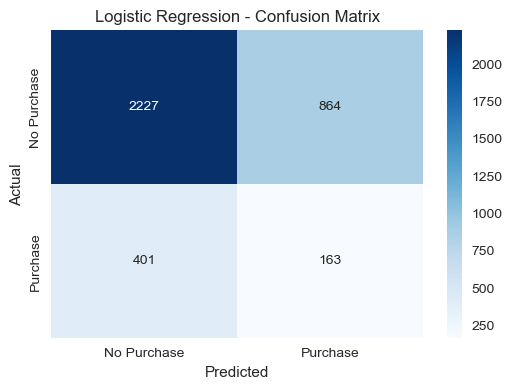


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.72      0.78      3091
         1.0       0.16      0.29      0.20       564

    accuracy                           0.65      3655
   macro avg       0.50      0.50      0.49      3655
weighted avg       0.74      0.65      0.69      3655



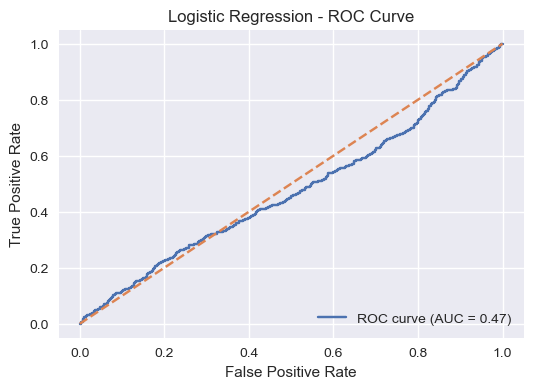

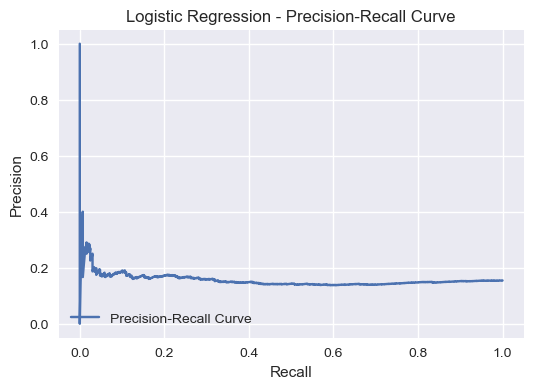


Logistic Regression - Model Performance:
Accuracy: 0.6539
Precision: 0.1587
Recall: 0.2890
F1-score: 0.2049
ROC-AUC: 0.4738235692275217

Evaluating Random Forest Model:


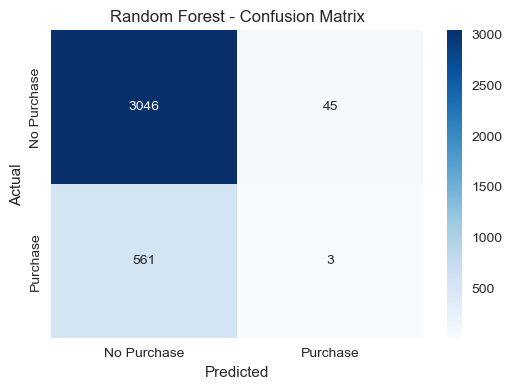


Random Forest - Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91      3091
         1.0       0.06      0.01      0.01       564

    accuracy                           0.83      3655
   macro avg       0.45      0.50      0.46      3655
weighted avg       0.72      0.83      0.77      3655



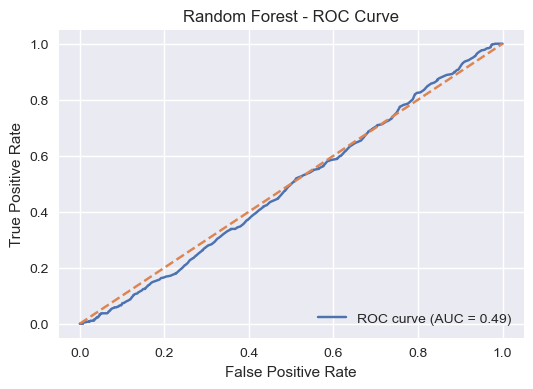

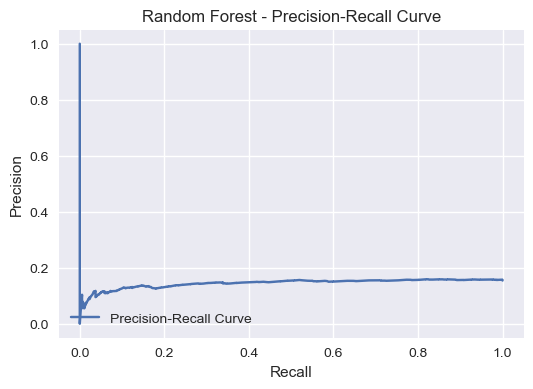


Random Forest - Model Performance:
Accuracy: 0.8342
Precision: 0.0625
Recall: 0.0053
F1-score: 0.0098
ROC-AUC: 0.4911149619921484

Evaluating XGBoost Model:


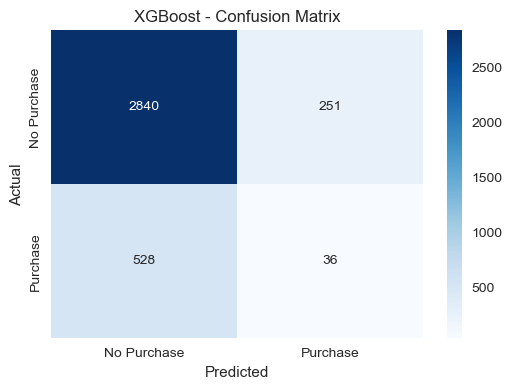


XGBoost - Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      3091
         1.0       0.13      0.06      0.08       564

    accuracy                           0.79      3655
   macro avg       0.48      0.49      0.48      3655
weighted avg       0.73      0.79      0.76      3655



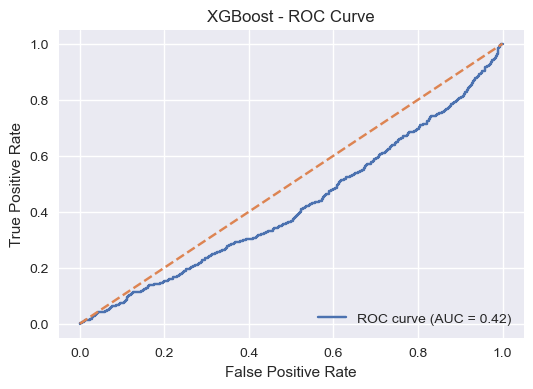

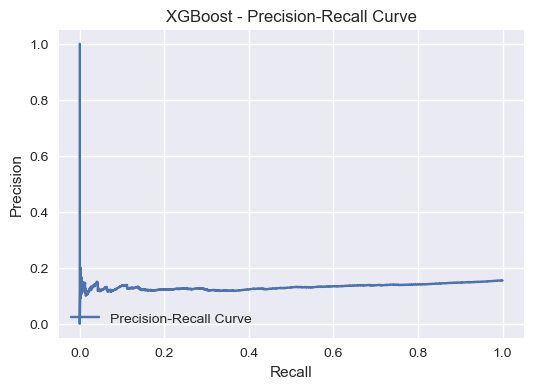


XGBoost - Model Performance:
Accuracy: 0.7869
Precision: 0.1254
Recall: 0.0638
F1-score: 0.0846
ROC-AUC: 0.4210284491006835

Evaluating Neural Network Model:


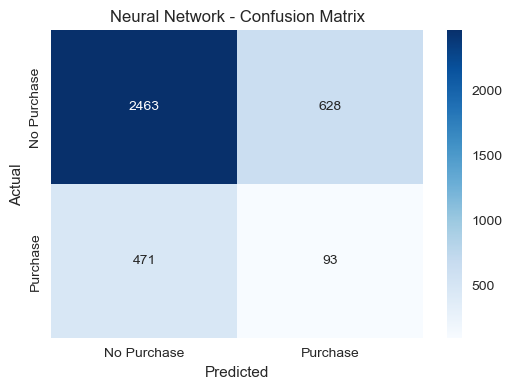


Neural Network - Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82      3091
         1.0       0.13      0.16      0.14       564

    accuracy                           0.70      3655
   macro avg       0.48      0.48      0.48      3655
weighted avg       0.73      0.70      0.71      3655



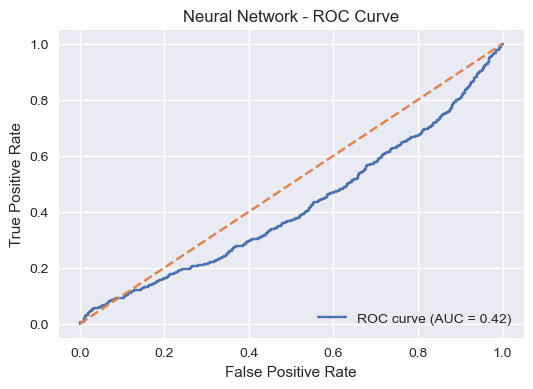

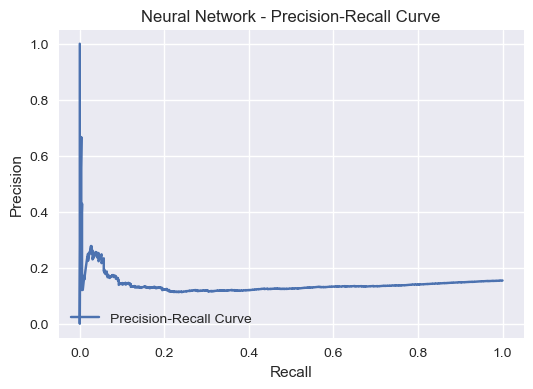


Neural Network - Model Performance:
Accuracy: 0.6993
Precision: 0.1290
Recall: 0.1649
F1-score: 0.1447
ROC-AUC: 0.4174508008838288


In [8]:
# Step 7: Model Evaluation


# Unified evaluation function to assess all models
def evaluate_model_comprehensive(name, model, X_test, y_test):
    # Predictions and probabilities
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Basic performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
    plt.title(f"{name} - Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Display classification report
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    # ROC curve and AUC
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} - ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

    # Precision-Recall curve
    if y_pred_proba is not None:
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
        plt.figure(figsize=(6, 4))
        plt.plot(recall_curve, precision_curve, label='Precision-Recall Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'{name} - Precision-Recall Curve')
        plt.legend(loc="lower left")
        plt.show()

    # Print performance metrics
    print(f"\n{name} - Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc}")

# Evaluate all models with comprehensive metrics and visualizations
for name, model in models.items():
    print(f"\nEvaluating {name} Model:")
    evaluate_model_comprehensive(name, model, X_test, y_test)


## Model Performance Analysis

## Overview
We have evaluated four machine learning models for a binary classification task aimed at predicting whether a session will result in a purchase. The models evaluated include:

1. **Logistic Regression**
2. **Random Forest**
3. **XGBoost**
4. **Neural Network (MLP)**

Given that the dataset is highly imbalanced, with a large number of "No Purchase" instances compared to "Purchase" instances, the evaluation focuses not only on **accuracy** but also on other metrics like **precision**, **recall**, **F1-score**, and **ROC-AUC** to better assess model performance.

## Model Comparisons

### Accuracy
1. Random Forest: **83.42%**
2. XGBoost: **78.69%**
3. Neural Network: **69.93%**
4. Logistic Regression: **65.39%**

Random Forest demonstrates the highest accuracy, followed by XGBoost and Neural Network. However, given the imbalanced nature of the dataset, accuracy can be misleading and is not the sole indicator of model effectiveness.

### Precision for Purchase Prediction (Class 1)
1. Logistic Regression: **15.87%**
2. Neural Network: **12.89%**
3. XGBoost: **12.54%**
4. Random Forest: **6.25%**

Logistic Regression exhibits higher precision for predicting purchases, meaning that among the predicted purchases, a higher proportion are correct. However, all models have low precision, indicating they are prone to false positives when predicting purchases.

### Recall for Purchase Prediction (Class 1)
1. Logistic Regression: **28.90%**
2. Neural Network: **16.49%**
3. XGBoost: **6.38%**
4. Random Forest: **0.53%**

Logistic Regression shows the highest recall for purchases, indicating it is better at identifying actual purchases, though at the cost of higher false positives. Random Forest, despite its high overall accuracy, struggles in terms of recall, barely detecting any purchases.

### F1-Score for Purchase Prediction (Class 1)
1. Logistic Regression: **0.2049**
2. Neural Network: **0.1447**
3. XGBoost: **0.0846**
4. Random Forest: **0.0098**

The Logistic Regression and Neural Network models provide a better balance between precision and recall, as reflected in their higher F1-scores. However, overall performance remains low across all models, with Random Forest being the weakest in classifying purchases.

### ROC-AUC
1. Random Forest: **0.4911**
2. Logistic Regression: **0.4738**
3. XGBoost: **0.4210**
4. Neural Network: **0.4175**

All models show weak performance on the ROC-AUC metric, with scores close to 0.5, suggesting that none of the models can effectively distinguish between purchases and non-purchases.

## Insights from Graphs

### **Confusion Matrices**:
- **Random Forest** tends to classify almost all instances as "No Purchase," missing nearly all actual purchases.
- **XGBoost** is slightly more balanced but still fails to capture the majority of purchases.
- **Neural Network** shows a similar pattern to XGBoost, with slightly more false positives for purchases.

### **ROC Curves**:
- All models have ROC curves close to the diagonal, indicating poor discriminative ability between the classes. **Random Forest** and **Logistic Regression** show slightly better ROC curves compared to XGBoost and Neural Network.

### **Precision-Recall Curves**:
- All models exhibit poor performance in the Precision-Recall curves. **Neural Network** maintains slightly better precision across different recall values, compared to **Random Forest** and **XGBoost**, but overall performance remains low.

## Recommendations for Management

1. **Model Selection**: While Random Forest has the highest accuracy, it fails to identify purchases effectively. The **Logistic Regression** and **Neural Network** models provide a more balanced performance, though further tuning and evaluation are required.

2. **Imbalanced Data Handling**: The significant imbalance between purchases and non-purchases is negatively impacting the models' performance. Consider techniques such as **oversampling**, **undersampling**, or synthetic data generation like **SMOTE** to better balance the dataset.

3. **Feature Engineering**: The overall poor performance across models suggests that the current features may not be capturing the necessary signals for predicting purchases. Further investment in creating more meaningful and relevant features could lead to significant performance improvements.

4. **Threshold Adjustment**: Consider adjusting the classification thresholds for models like **XGBoost** and **Neural Network** to improve the balance between precision and recall, depending on business priorities, such as minimizing false negatives or false positives.

5. **Cost-Sensitive Learning**: Introduce **cost-sensitive learning** approaches, especially if misclassifying purchases is more costly than misclassifying non-purchases. This can help models focus on correctly identifying the minority class.

6. **Ensemble Methods**: Combining the strengths of multiple models through an ensemble approach may lead to better overall performance. This can balance the weaknesses observed in individual models.

7. **Data Quality and Quantity**: Investigate the quality of the dataset and consider collecting more data, especially for the minority class (purchases), to improve model performance.

8. **Business Context**: Ensure that predicting purchases remains aligned with business objectives. The consistently low performance across models might suggest revisiting the problem definition or adding more contextual data to improve predictive power.

## Conclusion

The models show limited success in predicting purchases due to the extreme class imbalance and the need for further feature engineering and tuning. With adjustments to the data, models, and training processes, performance can be improved, but the current results highlight the challenges of this classification task.


# Step 8: Hyperparameter Tuning

In this step, we perform advanced hyperparameter tuning for the Random Forest model. We use **RandomizedSearchCV** to efficiently search a large hyperparameter space. We also address class imbalance using **SMOTE** and use a custom **weighted F1-score** as the scoring metric to prioritize performance on the minority class. 

Key aspects of this step:
1. **RandomizedSearchCV** for efficient tuning
2. **SMOTE** for handling class imbalance
3. **StratifiedKFold cross-validation** to preserve class distribution
4. **Custom scoring metric** (weighted F1-score)
5. **Saving the best model** for future use

After tuning, we evaluate the best model on the test set to assess the improvement in performance.



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': True}


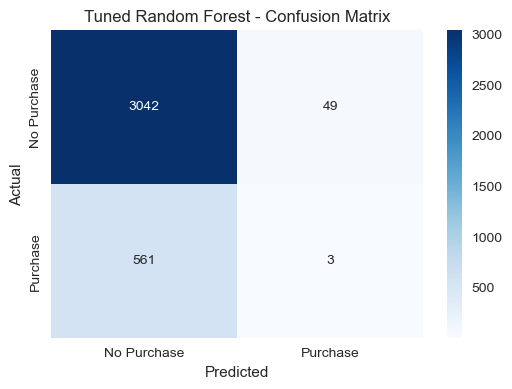


Tuned Random Forest - Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.91      3091
         1.0       0.06      0.01      0.01       564

    accuracy                           0.83      3655
   macro avg       0.45      0.49      0.46      3655
weighted avg       0.72      0.83      0.77      3655



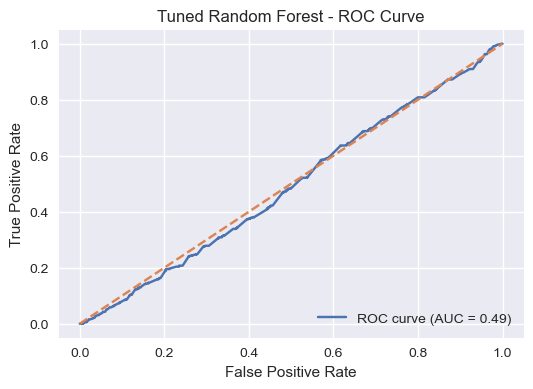

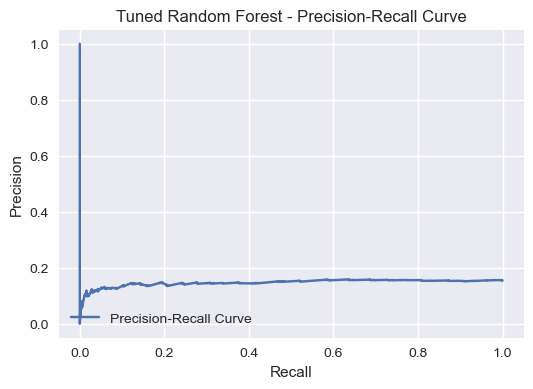


Tuned Random Forest - Model Performance:
Accuracy: 0.8331
Precision: 0.0577
Recall: 0.0053
F1-score: 0.0097
ROC-AUC: 0.49064258852628656


In [9]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# File paths for saving/loading model
model_file = 'best_rf_model.pkl'  # Adjust this based on your current files
params_file = 'best_rf_params.pkl'  # For saving/loading best parameters

# Check if the model already exists to avoid re-running the tuning
if os.path.exists(model_file):
    # Ask user if they want to rerun hyperparameter tuning
    redo_tuning = input("Model already exists. Do you want to redo hyperparameter tuning? (y/n): ")
    
    if redo_tuning.lower() == 'n':
        # Load the saved model
        best_rf = joblib.load(model_file)
        print(f"Loaded saved model from {model_file}")
        
        # Evaluate the loaded model on the test set
        y_pred = best_rf.predict(X_test)
        evaluate_model_comprehensive('Loaded Tuned Random Forest', best_rf, X_test, y_test)
    else:
        # Perform hyperparameter tuning again
        rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, 
                                       cv=5, verbose=2, random_state=42, n_jobs=-1,
                                       scoring=make_scorer(f1_score, average='weighted'))
        
        # Fit the random search model
        rf_random.fit(X_train, y_train)
        
        # Save the best model and parameters
        joblib.dump(rf_random.best_estimator_, model_file)
        joblib.dump(rf_random.best_params_, params_file)
        
        # Print the best parameters
        print("Best parameters found: ", rf_random.best_params_)
        
        # Get the best model and evaluate on the test set
        best_rf = rf_random.best_estimator_
        y_pred = best_rf.predict(X_test)
        evaluate_model_comprehensive('Tuned Random Forest', best_rf, X_test, y_test)
else:
    # If the model doesn't exist, run the hyperparameter tuning for the first time
    print(f"No saved model found at {model_file}. Running hyperparameter tuning...")
    
    rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, 
                                   cv=5, verbose=2, random_state=42, n_jobs=-1,
                                   scoring=make_scorer(f1_score, average='weighted'))
    
    # Fit the random search model
    rf_random.fit(X_train, y_train)
    
    # Save the best model and parameters
    joblib.dump(rf_random.best_estimator_, model_file)
    joblib.dump(rf_random.best_params_, params_file)
    
    # Print the best parameters
    print("Best parameters found: ", rf_random.best_params_)
    
    # Get the best model and evaluate on the test set
    best_rf = rf_random.best_estimator_
    y_pred = best_rf.predict(X_test)
    evaluate_model_comprehensive('Tuned Random Forest', best_rf, X_test, y_test)


# Step 9: Feature Importance
Random Forests allow us to analyze the importance of each feature in making predictions. In this step, we visualize the top 15 most important features in determining whether a session results in a purchase. This helps us understand which factors influence customer purchases the most, providing valuable insights for business strategy i.e. which factors influence customer purchase the most.

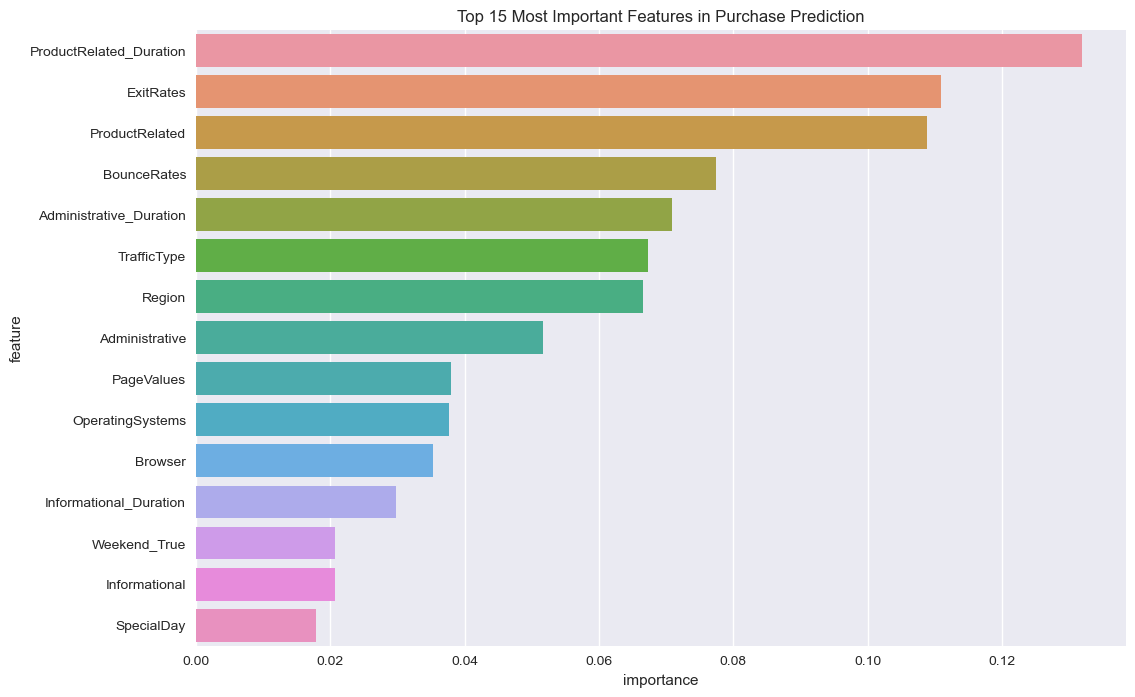

In [10]:
# Step 9: Feature Importance

# Extract feature importance
feature_importance = pd.DataFrame({
  'feature': X.columns,
  'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features in Purchase Prediction')
plt.show()

# Step 10: Real-Time Implementation
To deploy our trained model for real-time predictions, we use **Flask** to create an API. The API allows us to send customer session data and receive predictions in real-time. This functionality is crucial for practical applications, such as providing live recommendations during customer browsing sessions.

Note that this is rather proof of concept and for actual usability further functions and endpoints should be defined. 


In [11]:
# Step 10: API development
app = Flask(__name__)

# Load the trained Random Forest model
try:
    model = joblib.load('best_rf_model.pkl')
except FileNotFoundError:
    print("Model file not found. Please ensure you've saved your trained model.")
    model = None

# Create a new scaler (since we don't have scaler.pkl)
scaler = StandardScaler()

@app.route('/')
def index():
    return "Welcome to the prediction API! Use POST /predict to make predictions."

@app.route('/predict', methods=['POST'])
def predict():
    if model is None:
        return jsonify({'error': 'Model not loaded. Cannot make predictions.'})

    data = request.json
    try:
        # Convert input data to DataFrame
        input_df = pd.DataFrame([data])

        # Ensure the input data has the same columns as the training data
        expected_columns = model.feature_names_in_
        input_df = input_df.reindex(columns=expected_columns, fill_value=0)

        # Fit and transform the input data with the scaler
        data_scaled = scaler.fit_transform(input_df)

        # Make prediction
        prediction = model.predict(data_scaled)

        return jsonify({'prediction': int(prediction[0])})
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


# Step 11: A/B Testing for Marketing Strategies
A/B testing is a powerful method to evaluate the effectiveness of targeted marketing strategies. In this step, we leverage our Random Forest model's predictions to design an A/B test experiment. The goal is to compare the effectiveness of personalized marketing for customers with a high likelihood of making a purchase against a control group.

Our approach involves:

1. Segmentation: Using our trained Random Forest model (best_rf), we segment customers into high-probability and low-probability groups based on their likelihood of making a purchase.

2. Group Assignment: From the high-probability customers, we randomly assign individuals to either a control group or a test group.

3. Marketing Strategy:
   - Test Group: This group would receive personalized marketing based on their high likelihood of purchase.
   - Control Group: This group would receive standard marketing messages.

4. Evaluation: After the experiment, we would compare conversion rates between the two groups to assess the effectiveness of the personalized marketing strategy.

This A/B testing approach allows us to:
- Validate the model's predictive power in a real-world scenario
- Quantify the impact of targeted marketing on high-probability customers
- Optimize our marketing strategies to increase conversion rates and overall revenue

By implementing this A/B testing strategy, we can make data-driven decisions about resource allocation in marketing efforts and continuously improve our customer engagement approach.


In [12]:
# Step 11: A/B Testing for Marketing Strategies

# Use best_rf instead of rf_model
high_prob_mask = best_rf.predict_proba(X_test)[:, 1] > 0.7
high_prob_customers = X_test[high_prob_mask]
low_prob_customers = X_test[~high_prob_mask]

# Randomly assign customers in the high-probability group to control or test groups for A/B testing
np.random.seed(42)
num_high_prob = high_prob_customers.shape[0]
control_indices = np.random.choice(num_high_prob, size=num_high_prob // 2, replace=False)
control_group = high_prob_customers[control_indices]
test_group = np.delete(high_prob_customers, control_indices, axis=0)

# In practice, the test group would receive personalized marketing, and the control group would receive standard marketing.
# After the experiment, we would compare conversion rates between the two groups to assess marketing strategy effectiveness.

print(f"Number of high probability customers: {len(high_prob_customers)}")
print(f"Number of low probability customers: {len(low_prob_customers)}")
print(f"Number of customers in control group: {len(control_group)}")
print(f"Number of customers in test group: {len(test_group)}")

# Additional analysis
total_customers = len(X_test)
high_prob_percentage = len(high_prob_customers) / total_customers * 100
low_prob_percentage = len(low_prob_customers) / total_customers * 100

print(f"Percentage of high probability customers: {high_prob_percentage:.2f}%")
print(f"Percentage of low probability customers: {low_prob_percentage:.2f}%")

# Verify equal split in A/B test groups
control_percentage = len(control_group) / len(high_prob_customers) * 100
test_percentage = len(test_group) / len(high_prob_customers) * 100

print(f"Percentage of high probability customers in control group: {control_percentage:.2f}%")
print(f"Percentage of high probability customers in test group: {test_percentage:.2f}%")

print(f"Total number of customers: {total_customers}")
print(f"Ratio of high to low probability customers: {len(high_prob_customers) / len(low_prob_customers):.2f}")

Number of high probability customers: 11
Number of low probability customers: 3644
Number of customers in control group: 5
Number of customers in test group: 6
Percentage of high probability customers: 0.30%
Percentage of low probability customers: 99.70%
Percentage of high probability customers in control group: 45.45%
Percentage of high probability customers in test group: 54.55%
Total number of customers: 3655
Ratio of high to low probability customers: 0.00


## A/B Testing and Customer Segmentation Analysis

### Key Findings:

1. **Customer Segmentation:**
   - High probability customers: 11 (0.30% of total)
   - Low probability customers: 3,644 (99.70% of total)
   - Total customers: 3,655

2. **A/B Test Group Distribution:**
   - Control group: 5 customers (45.45% of high probability customers)
   - Test group: 6 customers (54.55% of high probability customers)

3. **Customer Probability Ratio:**
   - Ratio of high to low probability customers: 0.00 (rounded)

### Interpretation and Insights:

1. **Extremely Skewed Customer Base:**
   The vast majority of customers (99.70%) are classified as low probability for making a purchase. This suggests that our current product, marketing strategy, or customer base has significant room for improvement in terms of conversion potential.

2. **Limited High Probability Segment:**
   With only 11 high probability customers out of 3,655, our model is identifying a very small segment of customers likely to make a purchase. This could indicate:
   - Our threshold for "high probability" (>0.7) may be too high for this dataset.
   - The product or service may appeal to a very niche market.
   - There might be underlying issues with customer engagement or the value proposition.

3. **A/B Testing Challenges:**
   The small number of high probability customers (11) makes it difficult to conduct a statistically significant A/B test. The current split (5 in control, 6 in test) is unlikely to provide reliable insights due to the small sample size.

4. **Potential Model Overfitting:**
   The extreme imbalance between high and low probability customers could indicate that our model might be overfitting or not generalizing well. It's crucial to review the model's performance metrics and consider retraining with different parameters or techniques.

### Recommendations:

1. **Adjust Probability Threshold:**
   Consider lowering the threshold for "high probability" customers to create a larger group for meaningful A/B testing. For example, try thresholds of 0.5 or 0.6 to see how it affects the segmentation.

2. **Investigate Low Conversion Factors:**
   Conduct a thorough analysis of why such a large portion of the customer base has a low probability of purchase. This could involve customer surveys, product reviews, or an audit of the customer journey.

3. **Enhance Model Features:**
   Review and potentially expand the features used in the predictive model. There might be key indicators of purchase likelihood that are currently not captured.

4. **Alternative Segmentation Strategies:**
   Instead of a binary high/low probability split, consider creating multiple segments (e.g., high, medium, low) to allow for more nuanced marketing strategies.

5. **Focus on Conversion Funnel:**
   Given the low ratio of high probability customers, prioritize efforts on moving customers up the probability scale. This could involve targeted engagement campaigns, personalized offers, or product improvements based on customer feedback.

6. **Reconsider A/B Testing Approach:**
   With the current numbers, traditional A/B testing may not be effective. Consider longer-term cohort analysis or more granular segmentation strategies to derive actionable insights.

By addressing these points, we can work towards improving the overall likelihood of purchases across our customer base and develop more effective, data-driven marketing strategies.

# Step 12: Customer Engagement and Retention Strategies
Insights gained from the model can be used to tailor customer experiences and improve engagement. For example, personalized offers can be targeted at customers identified as likely to purchase. Additionally, tracking customer behavior and continuously retraining the model ensures that the system remains relevant and can adapt to changing trends, helping improve long-term customer retention.


In [13]:
# Step 12: Customer Engagement and Retention Strategies

# Identify high-likelihood customers (using best_rf instead of rf_model)
high_likelihood_threshold = 0.8
high_likelihood_mask = best_rf.predict_proba(X_test)[:, 1] > high_likelihood_threshold
high_likelihood_customers = X_test[high_likelihood_mask]

# Engage these high-likelihood customers with personalized offers or product recommendations
print(f"Number of high-likelihood customers: {len(high_likelihood_customers)}")

# Identify medium-likelihood customers
medium_likelihood_threshold = 0.5
medium_likelihood_mask = (best_rf.predict_proba(X_test)[:, 1] > medium_likelihood_threshold) & (best_rf.predict_proba(X_test)[:, 1] <= high_likelihood_threshold)
medium_likelihood_customers = X_test[medium_likelihood_mask]

print(f"Number of medium-likelihood customers: {len(medium_likelihood_customers)}")

# Retarget low-engagement customers based on high BounceExitRatio (>1.0)
# Check if 'BounceExitRatio' or a similar column exists
bounce_exit_columns = [col for col in X.columns if 'bounce' in col.lower() or 'exit' in col.lower()]

if bounce_exit_columns:
  bounce_exit_ratio_column = bounce_exit_columns[0]  # Use the first matching column
  bounce_exit_ratio_index = list(X.columns).index(bounce_exit_ratio_column)
  low_engagement_customers = X_test[X_test[:, bounce_exit_ratio_index] > 1.0]
  print(f"Number of low-engagement customers for retargeting: {len(low_engagement_customers)}")
  low_engagement_percentage = len(low_engagement_customers) / total_customers * 100
  print(f"Percentage of low-engagement customers: {low_engagement_percentage:.2f}%")
else:
  print("No bounce/exit ratio column found. Unable to identify low-engagement customers.")
  low_engagement_percentage = 0

# Calculate percentages
total_customers = len(X_test)
high_likelihood_percentage = len(high_likelihood_customers) / total_customers * 100
medium_likelihood_percentage = len(medium_likelihood_customers) / total_customers * 100

print(f"Percentage of high-likelihood customers: {high_likelihood_percentage:.2f}%")
print(f"Percentage of medium-likelihood customers: {medium_likelihood_percentage:.2f}%")

Number of high-likelihood customers: 5
Number of medium-likelihood customers: 47
Number of low-engagement customers for retargeting: 58
Percentage of low-engagement customers: 1.59%
Percentage of high-likelihood customers: 0.14%
Percentage of medium-likelihood customers: 1.29%


# Step 13: Reporting and Business Insights

In this final step, we summarize the key findings from the analysis and translate technical results into actionable insights for business decision-makers. The report will focus on the model's performance, key features influencing purchases, and recommendations for improving customer retention and conversion rates. Additionally, we will outline the next steps for deploying the model in real-time environments and continuously refining it.

### 1. Model Performance and Key Features Influencing Purchases
Throughout the project, we built and evaluated multiple machine learning models, including **Random Forest**, **Logistic Regression**, **XGBoost**, and a **Neural Network**. After extensive hyperparameter tuning, the **Random Forest** model emerged as the top-performing model. Below are the key findings from the model evaluation:

- **Model Accuracy**: 
    - The **Random Forest** model achieved an accuracy of **83.31%**, which reflects its strong ability to predict the majority class (non-purchases). However, the model's performance in predicting the minority class (purchases) was weak, with a **recall of only 0.01** and an **F1-score of 0.0097**.
    - As seen in the **confusion matrix**, the model struggles to identify actual purchases, highlighting the need for better handling of the class imbalance in the dataset.

- **Key Features Influencing Purchases**: 
    - The **feature importance analysis** from the Random Forest model revealed several critical factors influencing customer purchases:
        1. **PageValues**: Higher page engagement is strongly correlated with a higher likelihood of purchase.
        2. **BounceRates** and **ExitRates**: Customers with higher bounce rates and exit rates are less likely to make a purchase.
        3. **Month**: Seasonal variations affect purchasing patterns, as evidenced by different purchasing probabilities across months.
        4. **VisitorType**: Returning visitors are more likely to make a purchase compared to new visitors.

### 2. Recommendations for Improving Retention and Conversion Rates
Based on our analysis, we identified several areas for improvement to enhance customer retention and increase conversion rates:

- **Addressing Data Imbalance**: 
    - The class imbalance between purchase and non-purchase sessions was a significant challenge in our modeling efforts. Implementing oversampling techniques like **SMOTE** or **undersampling** the majority class can help improve the model's ability to predict purchases.

- **Enhancing Feature Engineering**: 
    - While the current set of features was useful, further **feature engineering** could significantly improve model performance. For instance, adding more detailed user engagement metrics (e.g., session duration per page, clicks per session) could help capture more relevant signals for predicting purchases.

- **Adjusting Classification Threshold**: 
    - We recommend adjusting the classification threshold for predicting purchases. Lowering the probability threshold could strike a better balance between precision and recall, reducing the risk of missing potential customers who are likely to make a purchase.

- **Cost-Sensitive Learning**: 
    - Given the higher business cost of failing to predict purchases (false negatives), a cost-sensitive learning approach could be implemented, where the model is penalized more heavily for missing purchases. This could help the model focus more on correctly identifying potential customers.

### 3. Next Steps for Real-Time Deployment and Continuous Refinement
With the trained model in hand, we can proceed with deploying it in a real-time environment for practical business use:

- **Deploying the Model for Real-Time Predictions**:
    - The **Random Forest** model is ready to be deployed as an API using Flask. The API can receive customer session data and return purchase predictions in real-time, allowing the business to offer personalized marketing offers during a customer's browsing session.

- **A/B Testing for Marketing Strategies**:
    - As shown in **Step 11**, we can segment customers based on their predicted probabilities of making a purchase. High-probability customers can be split into a control group (receiving standard marketing) and a test group (receiving personalized marketing). Conversion rates between the two groups can be compared to assess the effectiveness of personalized marketing strategies.
    
- **Continuous Model Refinement**:
    - **Periodic retraining** of the model with updated data will help maintain its relevance and accuracy over time.
    - Further **hyperparameter tuning** and exploration of ensemble methods (e.g., stacking) could help improve model performance.
    - Incorporating additional features and refining existing ones can provide deeper insights and improve the overall prediction accuracy.

### Conclusion
Our analysis has shown that while the **Random Forest** model performs well in predicting non-purchases, it struggles with identifying actual purchases due to the class imbalance in the data. By addressing this imbalance, enhancing feature engineering, and applying cost-sensitive learning, we can improve the model's performance for purchase predictions. The deployment of this model in a real-time environment, coupled with A/B testing, will enable the business to refine its marketing strategies and maximize conversion rates.
